[1, 1.5, 1.643616050735785] [0.20735384682180016, 0.01060408056376656, 0.0002912955492947603] 1.643616050735785
0.0002912955492947603, 0.000291296716498235
solution: 1.643616050735785
ut: 1.643616050735785


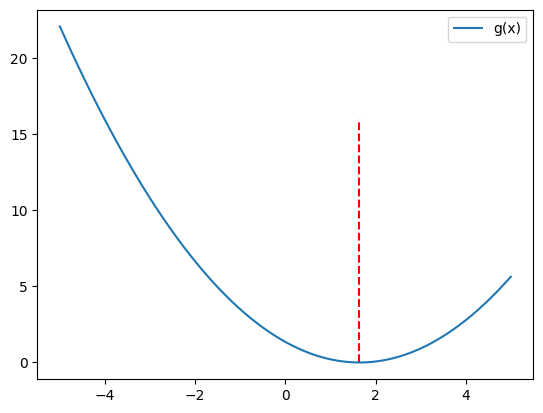

-1.643616050735785

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import math

rand_generator = np.random.default_rng(seed=0)

gamma1, gamma2 = 1, 1.5
def penalty_func(theta, gamma1=gamma1, gamma2=gamma2):
    """
    Penalty Function
    theta: scalar, input variable
    """
    if abs(theta) <= gamma1:
        return abs(theta)
    elif abs(theta) <= gamma2:
        return (2 * gamma2 * abs(theta) - theta * theta - gamma1 * gamma1) \
        / (2 * (gamma2 - gamma1))
    else:
        return (gamma1 + gamma2) / 2

# construct A, x_solution, b
m, n = 2 ** 10, 2 ** 12
# A: shape [m, n], mean 0, variance 1 / 2n
A = rand_generator.normal(0, 1 / math.sqrt(2 * n), (m, n))
x_solution = np.zeros(n)
random_positions = rand_generator.choice(range(n), size=160, replace=False)
for i in random_positions:
    x_solution[i] = rand_generator.choice([-1, 1])
b = np.dot(A, x_solution) + rand_generator.normal(0, 1 / math.sqrt(10**4), m)

# parameter of non-convex penalty function
mu = 0.1 * np.linalg.norm(np.dot(A.transpose(), b), ord=np.inf)  # coeff of penalty function
alpha_max, alpha_min = 10 ** 30, 1 / 10 ** 30
eta = 2
sigma = 0.01

def main_func(theta):
    """
    Main Objective Funtion
    theta: vector, input variable
    """
    fx = 0.5 * (np.linalg.norm(np.dot(A, theta) - b) ** 2)
    gx = sum([penalty_func(i) for i in theta])
    return fx + mu * gx

def solve_sub(ut, alpha):
    # find solution for ut_pos
    solution_set = []
    # (0, gamma1)
    if ut - mu / alpha <= 0:
        solution_set.append(0)
    elif ut - mu / alpha <= gamma1:
        solution_set.append(ut - mu / alpha)
    else:
        solution_set.append(gamma1)
    # (gamma1, gamma2)
    a = 1 - mu / (alpha * (gamma2 - gamma1))
    z = (ut - mu / alpha * gamma2 / (gamma2 - gamma1)) / a
    if a <= 0:
        solution_set.append(gamma1)
        solution_set.append(gamma2)
    else:
        if z <= gamma1:
            solution_set.append(gamma1)
        elif z <= gamma2:
            solution_set.append(z)
        else:
            solution_set.append(gamma2)
    # (gamma2, +∞)
    if ut < gamma2:
        solution_set.append(gamma2)
    else:
        solution_set.append(ut)
    
    def sub_function(theta):
        return 0.5 * (theta - ut) ** 2 + mu / alpha * penalty_func(theta)

    solution = min(solution_set, key=sub_function)
    print(solution_set, [sub_function(i) for i in solution_set], solution)

    # if t > 600:
    # check whether solution is the minimizer
    x = np.linspace(-5, 5, 10000)
    y = [sub_function(i) for i in x]
    # if not sub_function(solution) <= min(y) and abs(sub_function(solution) - min(y)) >= 0.01:
    print(f"{sub_function(solution)}, {min(y)}")
    print(f"solution: {solution}")
    print(f"ut: {ut}")
    plt.plot(x, y, label='g(x)')
    plt.vlines(solution, 0, 16, colors = "r", linestyles = "dashed")
    plt.legend()
    plt.show()

    return solution

ut = -1.643616050735785
alpha = 100
solve_sub(ut, alpha = alpha) if ut >= 0 else - solve_sub(-ut, alpha = alpha)

gamma 10k, 30k
beta 10 0.087
beta 5 0.072